In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
plt.rcParams.update({'font.size': 12})
plt.style.use("bmh")

In [2]:
np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr15_2020_off_season.npz.npy", allow_pickle=True).item()["dates"])


NameError: name 'folder' is not defined

In [3]:
dates_cao = np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr10_2020_off_season.npz.npy", allow_pickle=True).item())[0]


NameError: name 'folder' is not defined

In [63]:
from extract_training_data import * 
import socket

data_loc = "/uio/hume/student-u37/fslippe/data/"
folder = f"/uio/hume/student-u37/fslippe/data/models/patch_size128/filter{last_filter}/clustering/cao_date_time_lists/n_K_{nK}/"

dates_cao = np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr10_2020_off_season.npz.npy", allow_pickle=True).item())[0]["dates"]

x, dates, masks, lon_lats, mod_min = extract_1km_data("/scratch/fslippe/modis/MOD02_npz/2020/",
                                                        bands=[29],
                                                        date_list=np.unique(dates_cao),
                                                        return_lon_lat=True,
                                                        data_loc=data_loc,
                                                        data_type="npz",
                                                        combine_pics=True)

100%|██████████| 1/1 [00:45<00:00, 45.47s/it]


12
12


In [74]:
dates_cao

{'dates': ['2020129'], 'times': [2140]}

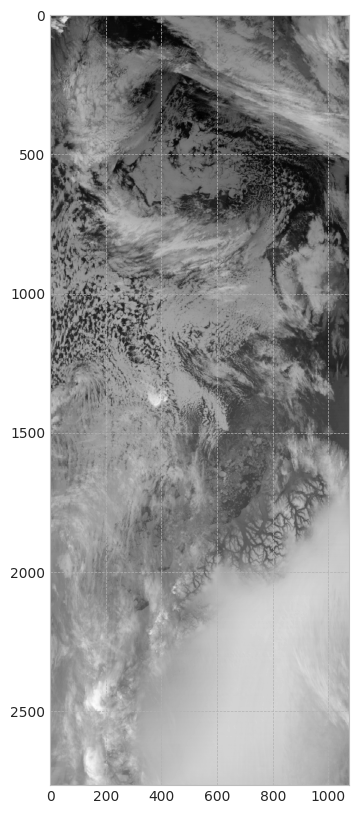

In [72]:

plt.figure(figsize = [10,10])
plt.imshow(x[-2], cmap="gray_r")

In [2]:

patch_size = 128
last_filter = 128
threshold = 10
n_Ks = [13]
years = [ 2020]#, 2021, 2022, 2023]
n_K = 13
yr = 2023
size_thresholds = [0, 50, 100, 300] #[300, 0, 100]#, 100, 300]
folder = "/scratch/fslippe/modis/MOD02_npz/2019/ /scratch/fslippe/modis/MOD02_npz/2020/ /scratch/fslippe/modis/MOD02_npz/2021/ /scratch/fslippe/modis/MOD02_npz/2022/ /scratch/fslippe/modis/MOD02_npz/2023/"

times_folder = f"/uio/hume/student-u37/fslippe/data/models/patch_size{patch_size}/filter{last_filter}/clustering/cao_date_time_lists/n_K_{n_K}/"

time_dict = np.load(times_folder + f"times_patch_size{patch_size}_filter{last_filter}_nK{n_K}_thr{threshold}_{yr}.npy", allow_pickle=True).item()
len(time_dict["dates"]) // 2

59

In [4]:
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
#dates_5 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_2020_21_5.npy")
# dates_15 = np.concatenate((np.load("/uio/hume/student-u37/fslippe/data/date_hist_20201201-20210131_15.npy"), 
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210201-20210331_15.npy"), 
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210501-20210630_15.npy"), 
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210401-20210801_15.npy"),
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210801-20210930_15.npy"),
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20211001-20211130_15.npy"))) 


# dates_10 = np.concatenate((np.load("/uio/hume/student-u37/fslippe/data/date_hist_20201201-20210131_10.npy"), 
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210201-20210331_10.npy"), 
#                         np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210501-20210630_10.npy"), 
#                        np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210401-20210801_10.npy"),
#                        np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210801-20211130_10.npy")
#                        ))

last_filter = 128 
nK = 13
year = 2021 
folder = f"/uio/hume/student-u37/fslippe/data/models/patch_size128/filter{last_filter}/clustering/cao_date_time_lists/n_K_{nK}/"
dates_5 = []
dates_3 = []

dates_10 = []
dates_15 = []
years = [2019, 2020, 2021, 2022, 2023]
days_in_month = np.zeros(12)
import calendar
for year in years:
    if year == 2020:
        for month in [5, 6, 7, 8, 9]:  # iterate over the 12 months
            _, num_days = calendar.monthrange(year, month)
            days_in_month[month-1] += num_days

    for month in [1, 2, 3, 4, 10, 11, 12]:  # iterate over the 12 months
        _, num_days = calendar.monthrange(year, month)
        days_in_month[month-1] += num_days

    d_5 = np.load(folder + f"times_patch_size128_filter{last_filter}_nK{nK}_thr5_{year}.npy", allow_pickle=True).item()["dates"]
    d_3 = np.load(folder + f"times_patch_size128_filter{last_filter}_nK{nK}_thr3_{year}.npy", allow_pickle=True).item()["dates"]

    d_10 = np.load(folder + f"times_patch_size128_filter{last_filter}_nK{nK}_thr10_{year}.npy", allow_pickle=True).item()["dates"]
    d_15 = np.load(folder + f"times_patch_size128_filter{last_filter}_nK{nK}_thr30_{year}.npy", allow_pickle=True).item()["dates"]
    d_10 = np.unique(d_10)
    d_5 = np.unique(d_5)
    d_15 = np.unique(d_15)
    dates_5.append(d_5)
    dates_10.append(d_10)
    dates_15.append(d_15)

dates_5.append(np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr5_2020_off_season.npy", allow_pickle=True).item()["dates"]))
dates_10.append(np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr10_2020_off_season.npy", allow_pickle=True).item()["dates"]))
dates_15.append(np.unique(np.load(folder + "times_patch_size128_filter128_nK13_thr15_2020_off_season.npy", allow_pickle=True).item()["dates"]))

dates_5 = np.concatenate(dates_5)
dates_10 = np.concatenate(dates_10)
dates_15 = np.concatenate(dates_15)

#dates_10 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_2020_21_10.npy")
#dates_plus10_7 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_202104+10_7.npy")
# ... [your other data loading here]

def extract_months(dates):
    years = [int(date[:4]) for date in dates]
    days = [int(date[4:]) for date in dates]
    months = [np.datetime64(f'{year}-01-01') + np.timedelta64(day-1,'D') for year, day in zip(years, days)]
    return [month.astype(object).month for month in months]

# Extract months from dates
months_5 = extract_months(dates_5)
months_15 = extract_months(dates_15)
months_10 = extract_months(dates_10)
#months_plus10_7 = extract_months(dates_plus10_7)
# Define a function to calculate the month percentages
def calculate_percentage(month_counts, days_in_month):
    return [100 * month_counts[i] / days_in_month[i] for i in range(12)]


# Set up side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), dpi =150)

# Plot actual counts on the first subplot for each dataset
bins = np.arange(1,14) - 0.5
n_5, _, _ = ax1.hist(months_5, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Minumum connected patches: 5")
n_10, _, _ = ax1.hist(months_10, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Minumum connected patches: 10")
n_15, _, _ = ax1.hist(months_15, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Minumum connected patches: 15")
#n_plus10_7, _, _ = ax1.hist(months_plus10_7, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="10W added Minumum connected patches: 7")


# Set properties for ax1
ax1.set_xticks(np.arange(1,13))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of days")
ax1.set_title("Number of days per Month")
ax1.legend()

# Plot percentages on the second subplot for each dataset
ax2.bar(np.arange(1,13) - 0.2, calculate_percentage(n_5, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 5")
ax2.bar(np.arange(1,13) , calculate_percentage(n_10, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 10")
ax2.bar(np.arange(1,13) + 0.2, calculate_percentage(n_15, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 15")
#ax2.bar(np.arange(1,13) + 0.4, calculate_percentage(n_plus10_7, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 10")

# Set properties for ax2
ax2.set_xticks(np.arange(1,13))
ax2.set_xlabel("Month")
ax2.set_ylabel("Percentage (%)")
ax2.set_title("Percentage of days per Month")
ax2.legend()

fig.suptitle("Cold Air Outbreaks 2019 - 2023", fontsize=20)
plt.tight_layout()
plt.savefig("/uio/hume/student-u37/fslippe/master_project/figures/hist_maps/cao_occurence_threshold_comparison.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/uio/hume/student-u37/fslippe/data/models/patch_size128/filter128/clustering/cao_date_time_lists/n_K_13/times_patch_size128_filter128_nK13_thr3_2019.npy'

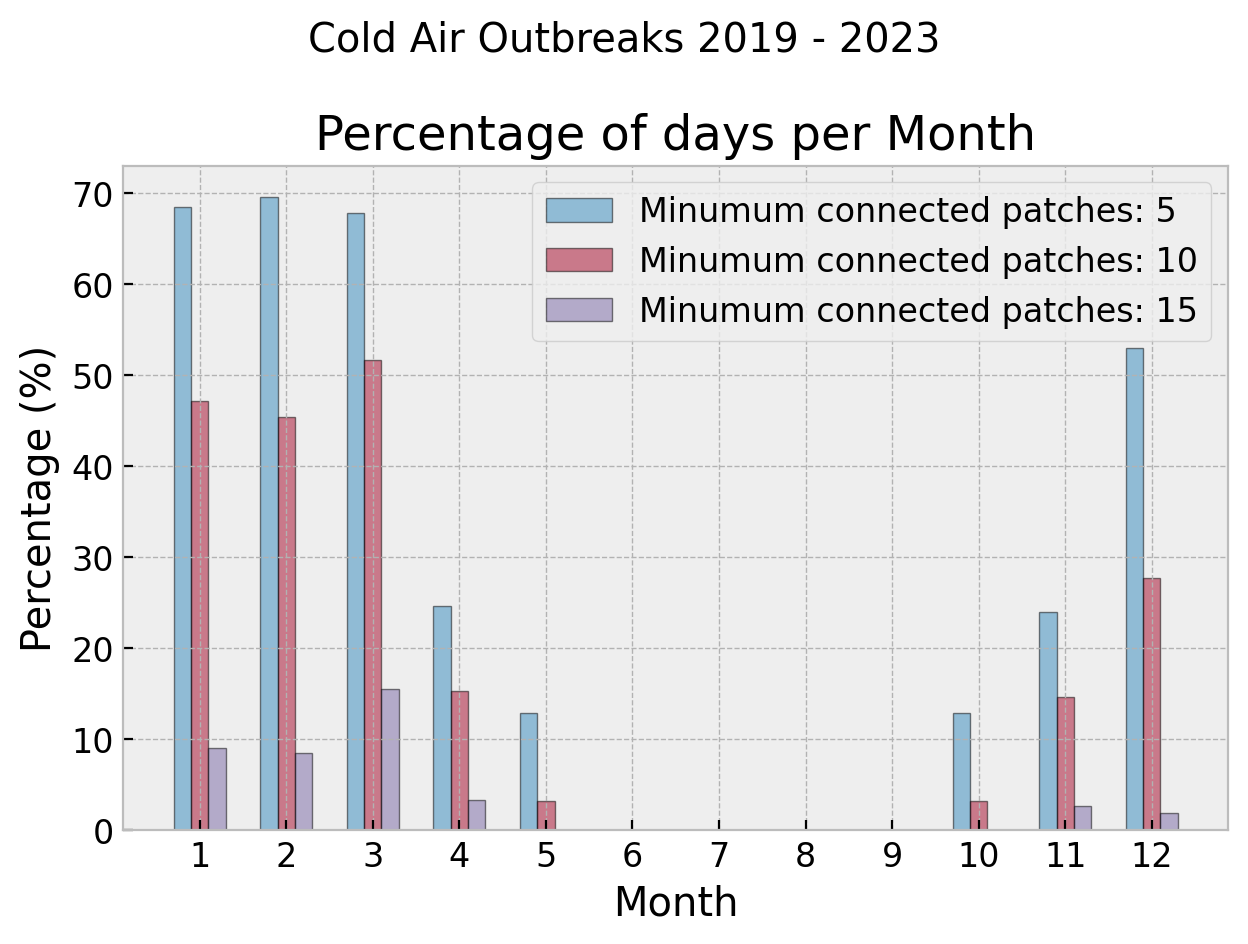

In [21]:
fig, ax2 = plt.subplots(1, dpi=200)
# Plot percentages on the second subplot for each dataset
ax2.bar(np.arange(1,13) - 0.2, calculate_percentage(n_5, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 5")
ax2.bar(np.arange(1,13) , calculate_percentage(n_10, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 10")
ax2.bar(np.arange(1,13) + 0.2, calculate_percentage(n_15, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Minumum connected patches: 15")
#ax2.bar(np.arange(1,13) + 0.4, calculate_percentage(n_plus10_7, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 10")

# Set properties for ax2
ax2.set_xticks(np.arange(1,13))
ax2.set_xlabel("Month")
ax2.set_ylabel("Percentage (%)")
ax2.set_title("Percentage of days per Month")
ax2.legend()

fig.suptitle("Cold Air Outbreaks 2019 - 2023")
plt.tight_layout()
plt.show()

In [4]:
from datetime import datetime
converted_dates = [datetime.strptime(date, '%Y%j').strftime('%Y%m%d') for date in dates_7]

np.array(converted_dates)

array(['20201201', '20201202', '20201203', '20201204', '20201205',
       '20201207', '20201208', '20201209', '20201210', '20201211',
       '20201212', '20201213', '20201214', '20201215', '20201217',
       '20201218', '20201219', '20201220', '20201221', '20201222',
       '20201223', '20201224', '20201226', '20201227', '20201228',
       '20201229', '20201230', '20201231', '20210101', '20210102',
       '20210103', '20210105', '20210106', '20210107', '20210108',
       '20210109', '20210110', '20210112', '20210113', '20210114',
       '20210115', '20210116', '20210117', '20210118', '20210119',
       '20210120', '20210121', '20210122', '20210123', '20210124',
       '20210125', '20210126', '20210127', '20210128', '20210129',
       '20210130', '20210131', '20210201', '20210202', '20210203',
       '20210204', '20210205', '20210206', '20210207', '20210208',
       '20210209', '20210210', '20210211', '20210212', '20210213',
       '20210214', '20210215', '20210217', '20210218', '202102

Total number of events: 24


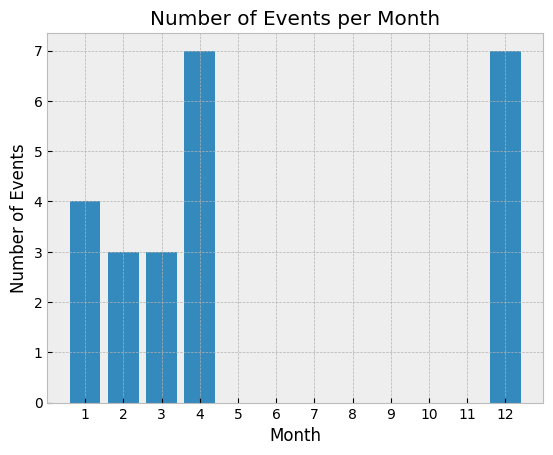

In [10]:

# Convert the dates to datetime objects
dates = [datetime.strptime(date, '%Y%j') for date in dates]

# Sort the dates
dates.sort()

# Count events
events = 1  # Start with 1 because the first date itself is an event start
for i in range(1, len(dates)):
    if dates[i] - dates[i-1] > timedelta(days=1):
        events += 1

print(f"Total number of events: {events}")
import matplotlib.pyplot as plt
import numpy as np

# Extract months from dates
months = [date.month for date in dates]

# Determine events for each month
event_counts = {}
for i in range(len(months)):
    if i == 0 or dates[i] - dates[i-1] > timedelta(days=1):
        event_counts[months[i]] = event_counts.get(months[i], 0) + 1

# Plotting
months_unique = list(event_counts.keys())
counts = [event_counts[month] for month in months_unique]
plt.bar(months_unique, counts)
plt.xticks(np.arange(1, 13))
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.title("Number of Events per Month")
plt.show()
